In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from IPython.display import display

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from scipy.stats import kstest, kruskal

from sklearn.svm import SVC
from sklearn.neighbors import NearestCentroid, KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [2]:
df = pd.read_excel('../data/CORK_STOPPERS.XLS', sheet_name=1)
df = df[1:101]
df.loc[df['C'] == 1, 'C'] = 0
df.loc[df['C'] == 2, 'C'] = 1

display(df.head())

,N,C,ART,N.1,PRT,ARM,PRM,ARTG,NG,PRTG,RAAR,RAN
1,1.0,0.0,81.0,41.0,250.0,1.98,6.10,9.0,1.0,12.0,11.11,2.44
2,2.0,0.0,80.0,42.0,238.0,1.91,5.67,0.0,0.0,0.0,0.00,0.00
3,3.0,0.0,81.0,26.0,196.0,3.12,7.54,9.8,1.8,15.0,12.04,6.73
4,4.0,0.0,125.0,63.0,368.0,1.98,5.84,20.0,1.0,18.0,16.00,1.59
5,5.0,0.0,146.0,45.0,350.0,3.24,7.78,42.8,2.8,43.0,29.28,6.11


In [3]:
X = df[['N.1', 'PRT']].copy()
# X = df.copy()
# X.drop(['C'], axis=1, inplace=True)
X['PRT'] /= 10
y = df['C'].copy()
X.head()

,N.1,PRT
1,41.0,25.0
2,42.0,23.8
3,26.0,19.6
4,63.0,36.8
5,45.0,35.0


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42, stratify=y)

In [5]:
from sklearn import svm
from sklearn.metrics import accuracy_score

clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
display(accuracy)

0.9

In [6]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


C_values = [2**i for i in range(-25, 16)]

accuracies = []

for _ in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
    acc_for_c = []

    for C in C_values:
        clf = SVC(kernel='linear', C=C)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        acc_for_c.append(accuracy)

    accuracies.append(acc_for_c)

mean_accuracies = np.mean(accuracies, axis=0)
best_C = max(accuracies)
best_C_index = accuracies.index(best_C)

print("       AVG Accuracy", mean_accuracies)
print("      Best Accuracy", best_C)
print("Best Accuracy Index", best_C_index)

       AVG Accuracy [0.49  0.49  0.49  0.49  0.49  0.49  0.49  0.49  0.49  0.568 0.708 0.78
 0.82  0.826 0.842 0.86  0.864 0.88  0.892 0.894 0.89  0.89  0.894 0.892
 0.892 0.892 0.89  0.89  0.89  0.89  0.888 0.89  0.892 0.894 0.892 0.89
 0.896 0.892 0.888 0.89  0.892]
      Best Accuracy [0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.82, 0.82, 0.84, 0.84, 0.84, 0.82, 0.82, 0.9, 0.9, 0.92, 0.92, 0.92, 0.92, 0.92, 0.92, 0.92, 0.92, 0.92, 0.92, 0.92, 0.92, 0.92, 0.92, 0.92, 0.92, 0.92, 0.92, 0.9, 0.88, 0.88]
Best Accuracy Index 6


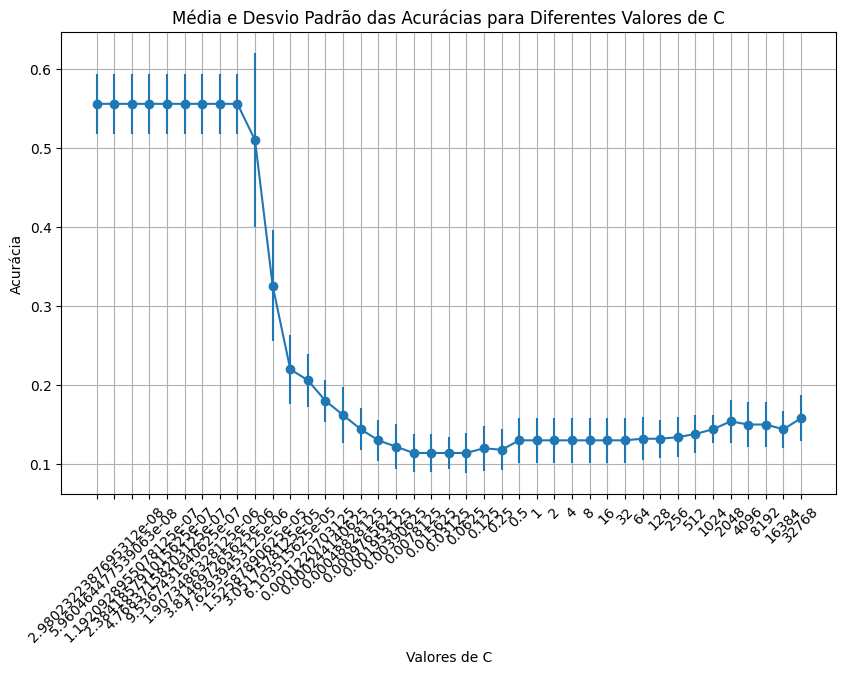

In [103]:
accuracies = 1-np.array(accuracies)
mean_accuracies = np.mean(accuracies, axis=0)
std_accuracies = np.std(accuracies, axis=0)

plt.figure(figsize=(10, 6))

plt.errorbar(np.arange(len(C_values)), mean_accuracies, yerr=std_accuracies, fmt='-o')

plt.xlabel('Valores de C')
plt.ylabel('Acurácia')

plt.xticks(np.arange(len(C_values)), [str(C) for C in C_values], rotation=45)
plt.title('Média e Desvio Padrão das Acurácias para Diferentes Valores de C')
plt.grid(True)
plt.show()

In [7]:
best_error_x = np.argmin(mean_accuracies)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y)

clf = SVC(kernel='linear', C=C_values[best_error_x])
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

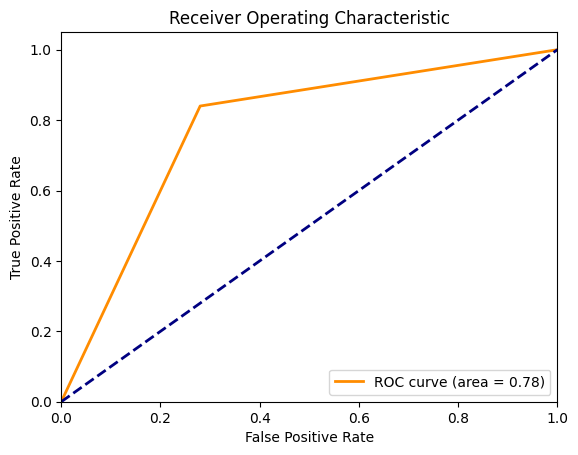

In [8]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [20]:
C_values = [2**i for i in range(-5, 12)]
gamma_values = [2**i for i in range(-30, 5)]

errors = []

for _ in range(1):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

    err1 = []
    for C in C_values:
        err2 = []
        for G in gamma_values:
            clf = SVC(kernel='linear', C=C, gamma=G)
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)

            accuracy = accuracy_score(y_test, y_pred)
            err2.append(1 - accuracy)
        err1.append(err2)
    errors.append(err1)

In [39]:
print(len(errors[0][0]))
print(len(errors[0]))
print(errors[0][0])
print(errors[0])

35
17
[0.16000000000000003, 0.16000000000000003, 0.16000000000000003, 0.16000000000000003, 0.16000000000000003, 0.16000000000000003, 0.16000000000000003, 0.16000000000000003, 0.16000000000000003, 0.16000000000000003, 0.16000000000000003, 0.16000000000000003, 0.16000000000000003, 0.16000000000000003, 0.16000000000000003, 0.16000000000000003, 0.16000000000000003, 0.16000000000000003, 0.16000000000000003, 0.16000000000000003, 0.16000000000000003, 0.16000000000000003, 0.16000000000000003, 0.16000000000000003, 0.16000000000000003, 0.16000000000000003, 0.16000000000000003, 0.16000000000000003, 0.16000000000000003, 0.16000000000000003, 0.16000000000000003, 0.16000000000000003, 0.16000000000000003, 0.16000000000000003, 0.16000000000000003]
[[0.16000000000000003, 0.16000000000000003, 0.16000000000000003, 0.16000000000000003, 0.16000000000000003, 0.16000000000000003, 0.16000000000000003, 0.16000000000000003, 0.16000000000000003, 0.16000000000000003, 0.16000000000000003, 0.16000000000000003, 0.16

In [66]:
import matplotlib.pyplot as plt

mean_err = np.mean(errors, axis=0)
std_err = np.std(errors, axis=0)

# Find the minimum average error and corresponding index
idx_min_err = np.argmin(mean_err)
min_err = mean_err[idx_min_err]

# Get the best C value
best_C = C[idx_min_err]
print('Best C:', best_C)
print('Minimum average error:', min_err)

# Plot average error for different C values with error bars
plt.figure()
plt.errorbar(np.log2(C), mean_err, yerr=std_err, fmt='o-', linewidth=1.5, markersize=8, capsize=10)
plt.xlabel('log2(C)')
plt.ylabel('Average Error')
plt.title('Average Error for Different Values of C')
plt.grid(True)
plt.legend(['Average Error', 'Standard Deviation'])
plt.show()



# average_errors = np.mean(errors, axis=0)
# 
# print(len(C_values), gamma_values.shape, average_errors.shape)
# 
# # Plotar a superfície de erro
# fig = plt.figure(figsize=(10, 6))
# ax = fig.add_subplot(111, projection='3d')
# ax.plot_surface(C_values, gamma_values, average_errors, cmap='viridis')
# ax.set_xlabel('log2(C)')
# ax.set_ylabel('log2(Gamma)')
# ax.set_zlabel('Erro')
# ax.set_title('Superfície de Erro em Função de C e Gamma')
# plt.show()

TypeError: 'int' object is not subscriptable